# Logistic Regression On Amazon Food Reviews


The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review


### Objective:
 * Apply Logistic Regression on Amazon food reviews using l1 and l2 regularisation .find optimal 'lambda'
* For different values of 'lambda' report accuracy ,error,sparsity
 * Feature Importance

In [1]:
import sqlite3
import pandas as pd
import numpy as np

import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from sklearn import cross_validation
from collections import Counter

# Loading the data


The dataset is available in two forms

1) .csv file
2)  SQLite Database




In order to load the data, We have used the SQLITE dataset as it easier to query the data and visualise the data efficiently. 
Here as we only want to get the global sentiment of the recommendations (positive or negative), we will purposefully ignore all Scores equal to 3. If the score id above 3, then the recommendation wil be set to "positive". Otherwise, it will be set to "negative"


Also we sort data by time-based slicing

## Loading Preprocessed Data

I have preprocessed the data separately for 250k points and stored in cleanedreviews.csv

In [2]:
df=pd.read_csv('cleanedreviews.csv')
df.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,witty little book makes son laugh loud recite ...
1,1,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,1,940809600,This whole series is great way to spend time w...,remember seeing show aired television years ag...
2,2,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,1,944092800,Entertainingl Funny!,beetlejuice well written movie everything exce...
3,3,230285,B00004RYGX,A344SMIA5JECGM,Vincent P. Ross,1,2,1,944438400,A modern day fairy tale,twist rumplestiskin captured film starring mic...
4,4,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,1,944438400,A modern day fairy tale,twist rumplestiskin captured film starring mic...


In [3]:
df['Score'].value_counts()

1    215035
0     34965
Name: Score, dtype: int64

In [4]:
#array that contains +ve=1 and -ve=0 reviews
y=np.array(df['Score'])

In [5]:
type(y)

numpy.ndarray

In [6]:
df['Class']=['positive' if s==1 else 'negative' for s in df['Score']]

## Splitting the data into train and test data

In [7]:
# split the data set into train and test
x_1, x_test, y_1, y_test = cross_validation.train_test_split(df['Text'], y, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
x_tr, x_cv, y_tr, y_cv = cross_validation.train_test_split(x_1, y_1, test_size=0.3,random_state=0)

In [8]:
def plot_confusion_matrix(cm, cls=set(df['Class']),
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(cls))
    plt.xticks(tick_marks, cls, rotation=45)
    plt.yticks(tick_marks, cls)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Bag of Words(BoW) on Reviews(text)

In [77]:
count_vect=CountVectorizer(binary=True,max_features=500,dtype='float').fit(x_tr)

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score


ModuleNotFoundError: No module named 'sklearn.grid_search'

## Logistic Regression


Using GridSearchCV and RandomSearchCV to find optimal 'lambda' and applying logistic regression by using both L1 and L2 regularisation

In [13]:
tuned_parameters=[{'C':[10**-4,10**-2,10**0,10**2,10**4]}]

### GridSearchCV

In [78]:
x_trainvectorised=count_vect.transform(x_tr)

In [17]:
#l2 regularisation 

lr_model=GridSearchCV(LogisticRegression(penalty='l2'),tuned_parameters,scoring='f1',cv=5)
lr_model.fit(x_trainvectorised,y_tr)
print(lr_model.best_estimator_)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [18]:
#optimal c=(1/lambda)

lr_model.best_params_
#optimal lambda=100

{'C': 100}

In [79]:
x_testvectorised=count_vect.transform(x_test)

In [80]:
x_cvvectoriesed=count_vect.transform(x_cv)

In [20]:
lr_model.score(x_testvectorised,y_test)

0.9405678934486539

In [21]:
from sklearn.metrics import confusion_matrix
import itertools

Confusion matrix, without normalization
[[ 4445  6102]
 [ 1814 62639]]


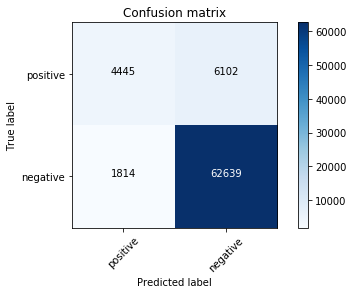

In [22]:
#confusion matrix
y_pred=lr_model.predict(x_testvectorised)
plot_confusion_matrix(confusion_matrix(y_test,y_pred))

In [25]:
from sklearn.metrics import log_loss

In [29]:
#L1 regularisation

lr_model2=GridSearchCV(LogisticRegression(penalty='l1'),tuned_parameters,scoring='f1',cv=5)
lr_model2.fit(x_trainvectorised,y_tr)
print(lr_model2.best_estimator_)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [20]:
lr_model2.best_params_
#optimal lambda=0.01

{'C': 100}

In [21]:
#score
lr_model2.score(x_testvectorised,y_test)

0.9405618028135181

Confusion matrix, without normalization
[[ 4434  6113]
 [ 1805 62648]]


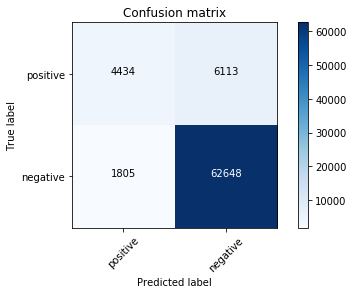

In [23]:
y_pred=lr_model2.predict(x_testvectorised)
plot_confusion_matrix(confusion_matrix(y_test,y_pred))

### RandomSearchCV

In [31]:
#Generating list [10**-1,10**8] for randomised search
tuned_parameters2={'C':[10**x for x in range(-2,8)]}


In [33]:
#L2 Regularisation

from sklearn.model_selection import RandomizedSearchCV
lr_model3=RandomizedSearchCV(LogisticRegression(penalty='l2'),tuned_parameters2,scoring='f1',cv=5)
lr_model3.fit(x_trainvectorised,y_tr)
lr_model3.best_estimator_

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
#optimal C=1/lambda
lr_model3.best_params_

{'C': 100}

In [35]:
lr_model3.best_score_

0.941240279979373

In [37]:
#L1 regularisation

lr_model4=RandomizedSearchCV(LogisticRegression(penalty='l1'),tuned_parameters2,scoring='f1',cv=5)
lr_model4.fit(x_trainvectorised,y_tr)
lr_model4.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
#optimal C=1/lambda
lr_model4.best_params_

{'C': 100000}

In [29]:
lr_model4.best_score_

0.9414472724279256

For values of depth =  0.0001 The log loss is: 0.3928734238675757
For values of depth =  0.01 The log loss is: 0.2617703033356382
For values of depth =  1 The log loss is: 0.255485127106732
For values of depth =  100 The log loss is: 0.2555290387897817
For values of depth =  10000 The log loss is: 0.2555295255046781


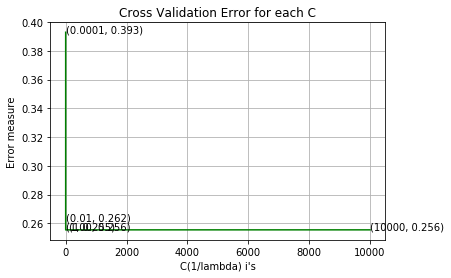

In [30]:
#CV-Error for L2 regurlarisation
alpha = [10**-4,10**-2,10**0,10**2,10**4]
cv_log_error_array=[]
for i in alpha:
    lr = LogisticRegression(C=i,random_state=42,penalty='l2')
    lr.fit(x_trainvectorised, y_tr)
    predict_y = lr.predict_proba(x_cvvectoriesed)
    #finding CV-error
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=lr.classes_, eps=1e-15))
    print('For values of depth = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=lr.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each C")
plt.xlabel("C(1/lambda) i's")
plt.ylabel("Error measure")
plt.show()


## By using L1 Regularisation find error and sparsity for different values of lambda

 More Sparsity (Fewer elements of W* being non-zero) by increasing Lambda (decreasing C) 


### lambda=10

In [81]:
#lambda=10
lr1=LogisticRegression(penalty='l1',C=0.1)
lr1.fit(x_trainvectorised,y_tr)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
print("The number of non-zero elements %d" %np.count_nonzero(lr1.coef_))
print("accuracy %f" %(lr1.score(x_testvectorised,y_test)*100))
print("error %f "%(100-(lr1.score(x_testvectorised,y_test)*100)))

The number of non-zero elements 437
accuracy 89.357333
error 10.642667 


### lambda=100

In [42]:
#lambda=100
lr2=LogisticRegression(penalty='l1',C=0.01)
lr2.fit(x_trainvectorised,y_tr)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
print("The number of non-zero elements %d" %np.count_nonzero(lr2.coef_))
print("accuracy %f" %(lr2.score(x_testvectorised,y_test)*100))
print("error %f "%(100-(lr2.score(x_testvectorised,y_test)*100)))

The number of non-zero elements 227
accuracy 88.628000
error 11.372000 


### Lambda=1000

In [43]:
lr3=LogisticRegression(penalty='l1',C=0.001)
lr3.fit(x_trainvectorised,y_tr)
 

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
print("The number of non-zero elements %d" %np.count_nonzero(lr3.coef_))
print("accuracy %f" %(lr3.score(x_testvectorised,y_test)*100))
print("error %f "%(100-(lr3.score(x_testvectorised,y_test)*100)))

The number of non-zero elements 16
accuracy 85.940000
error 14.060000 


### lambda=0.1

In [44]:
lr4=LogisticRegression(penalty='l1',C=10)
lr4.fit(x_trainvectorised,y_tr)
print("The number of non-zero elements %d" %np.count_nonzero(lr4.coef_))
print("accuracy %f" %(lr4.score(x_testvectorised,y_test)*100))
print("error %f "%(100-(lr4.score(x_testvectorised,y_test)*100)))

The number of non-zero elements 500
accuracy 89.441333
error 10.558667 


### Lambda=0.01

In [45]:
lr5=LogisticRegression(penalty='l1',C=100)
lr5.fit(x_trainvectorised,y_tr)
print("The number of non-zero elements %d" %np.count_nonzero(lr5.coef_))
print("accuracy %f" %(lr5.score(x_testvectorised,y_test)*100))
print("error %f "%(100-(lr5.score(x_testvectorised,y_test)*100)))

The number of non-zero elements 500
accuracy 89.445333
error 10.554667 


### Lambda=0.001

In [46]:
lr5=LogisticRegression(penalty='l1',C=1000)
lr5.fit(x_trainvectorised,y_tr)
print("The number of non-zero elements %d" %np.count_nonzero(lr5.coef_))
print("accuracy %f" %(lr5.score(x_testvectorised,y_test)*100))
print("error %f "%(100-(lr5.score(x_testvectorised,y_test)*100)))

The number of non-zero elements 500
accuracy 89.446667
error 10.553333 


## Observation:
For smaller values of lambda we are getting higher accuracy than for bigger values of lambda

## Feature Importance 

Using weights of features to determine importance

In [82]:
#obtaining weights of features before adding epsilon
lr1.coef_

array([[-2.01583686e-01,  0.00000000e+00, -2.20429738e-01,
        -1.13616424e-01, -6.73049155e-02,  0.00000000e+00,
        -5.00579529e-01,  3.49802940e-01,  0.00000000e+00,
        -4.74703415e-02,  5.42768372e-01,  8.95761927e-02,
        -6.40511886e-02, -4.86313187e-01,  1.60733480e-01,
         5.37010120e-02,  5.10239539e-02,  3.03140461e-03,
        -2.90040690e-02,  5.92067535e-01,  1.28972548e+00,
         9.17700256e-02, -8.02049475e-02, -4.82148078e-02,
        -8.18713993e-02, -2.05863565e-01,  0.00000000e+00,
         1.11893483e-02, -5.97063417e-02, -4.86764646e-01,
         0.00000000e+00,  3.46631272e-01, -8.53747185e-01,
         1.32858534e+00, -2.60440662e-01, -3.13323959e-01,
        -9.91709931e-01, -1.11861098e-01, -2.81151746e-01,
         5.89066957e-02, -2.64021285e-01, -1.46023443e-01,
         0.00000000e+00, -3.66774630e-02,  0.00000000e+00,
         1.36129713e+00,  9.20330799e-02,  1.68559243e-02,
         4.40188614e-01, -3.13567831e-01, -6.27439160e-0

In [83]:
lr1.coef_.shape

(1, 500)

In [84]:
# Transpose of feature weights array and taking absolute value of weights
w_1=np.transpose(lr1.coef_)
w1=np.abs(w_1)
w_1.shape

(500, 1)

In [85]:
lr1.intercept_.shape

(1,)

In [86]:
#Getting feature names from Vectoriser

count_vect.get_feature_names()

['10',
 '100',
 '12',
 '15',
 '20',
 '30',
 '50',
 'able',
 'absolutely',
 'actually',
 'add',
 'added',
 'ago',
 'almost',
 'along',
 'already',
 'also',
 'alternative',
 'although',
 'always',
 'amazing',
 'amazon',
 'amount',
 'another',
 'anyone',
 'anything',
 'aroma',
 'around',
 'arrived',
 'artificial',
 'ate',
 'available',
 'away',
 'awesome',
 'baby',
 'back',
 'bad',
 'bag',
 'bags',
 'bar',
 'bars',
 'based',
 'beans',
 'beef',
 'believe',
 'best',
 'better',
 'big',
 'bit',
 'bite',
 'bitter',
 'black',
 'blend',
 'bold',
 'bottle',
 'bought',
 'bowl',
 'box',
 'boxes',
 'brand',
 'brands',
 'bread',
 'breakfast',
 'brew',
 'brown',
 'bulk',
 'butter',
 'buy',
 'buying',
 'calories',
 'came',
 'candy',
 'canned',
 'cannot',
 'cans',
 'care',
 'case',
 'cat',
 'cats',
 'cereal',
 'change',
 'cheaper',
 'cheese',
 'chew',
 'chicken',
 'chip',
 'chips',
 'chocolate',
 'choice',
 'cinnamon',
 'clean',
 'close',
 'coconut',
 'coffee',
 'coffees',
 'cold',
 'com',
 'come',
 'co

In [87]:
#Converting list to array
features=np.asarray(count_vect.get_feature_names())
type(features)
features.shape

(500,)

## Checking for Collinearity of features(Perturbation test)

In [88]:
#generating epsilon of N(0,0.1)
epsilon=np.random.normal(loc=0,scale=0.1)


In [89]:
epsilon

0.18361599047949248

### Adding epsilon to our Standardized dat

In [90]:
type(x_trainvectorised)
x_trainvectorised.shape

(122500, 500)

In [91]:
#finding non-zero elements positons
x_trainvectorised.nonzero()

(array([     0,      0,      0, ..., 122499, 122499, 122499], dtype=int32),
 array([158, 226, 259, ..., 435, 456, 460], dtype=int32))

In [92]:
#Adding epsilon by preserving sparsity source:https://stackoverflow.com/questions/45052924/scipy-csr-matrix-element-wise-addition

x_data=csr_matrix(x_trainvectorised)
x_data.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [93]:
x_data.data=x_data.data+epsilon

### Applying Logistic Regression on our new data(i-e data after adding epsilon)

In [94]:
lr6=LogisticRegression(penalty='l1',C=0.1)
lr6.fit(x_data,y_tr)
print(np.count_nonzero(lr6.coef_))
print(lr6.score(x_testvectorised,y_test))

446
0.8928933333333333


In [95]:
#obtaining weights of features after adding epsilon
lr6.coef_

array([[-1.74872069e-01,  0.00000000e+00, -1.94067600e-01,
        -1.08140104e-01, -6.72886340e-02,  0.00000000e+00,
        -4.33884028e-01,  3.01547975e-01,  0.00000000e+00,
        -4.42328903e-02,  4.63848166e-01,  8.05423046e-02,
        -6.59433334e-02, -4.17125531e-01,  1.50143550e-01,
         5.65797250e-02,  4.35568383e-02,  1.24232120e-02,
        -3.21572685e-02,  5.03653785e-01,  1.11059445e+00,
         7.85268283e-02, -7.33693707e-02, -4.21871371e-02,
        -7.51973458e-02, -1.77812129e-01,  0.00000000e+00,
         1.38741292e-02, -5.55516381e-02, -4.20130781e-01,
         0.00000000e+00,  2.97734125e-01, -7.26670415e-01,
         1.14786128e+00, -2.34845899e-01, -2.69014857e-01,
        -8.41836409e-01, -9.66239481e-02, -2.40872026e-01,
         6.20304659e-02, -2.35973491e-01, -1.29386619e-01,
         0.00000000e+00, -3.86234804e-02,  5.83863660e-03,
         1.15632790e+00,  8.04947449e-02,  1.77313220e-02,
         3.75960596e-01, -2.75791344e-01, -5.39904144e-0

In [96]:
lr6.coef_.shape

(1, 500)

In [97]:
# Transpose of feature weights array and taking absolute value of weightsb
w_2=np.transpose(lr6.coef_)
w2=np.abs(w_2)
w_2.shape


(500, 1)

In [98]:
# Calculating % change in Weights after adding epsilon(noise) to data
for i in range(0,500):
    w_change=((w_2[i]-w_1[i])/(np.abs(w_1)))*100

In [99]:
w_change

array([[-9.43852884e+01],
       [           -inf],
       [-8.63156420e+01],
       [-1.67462886e+02],
       [-2.82691601e+02],
       [           -inf],
       [-3.80090140e+01],
       [-5.43921510e+01],
       [           -inf],
       [-4.00808878e+02],
       [-3.50546114e+01],
       [-2.12406151e+02],
       [-2.97052010e+02],
       [-3.91240354e+01],
       [-1.18373187e+02],
       [-3.54304949e+02],
       [-3.72894158e+02],
       [-6.27647469e+03],
       [-6.55995348e+02],
       [-3.21357501e+01],
       [-1.47523908e+01],
       [-2.07328419e+02],
       [-2.37223948e+02],
       [-3.94620143e+02],
       [-2.32395372e+02],
       [-9.24230296e+01],
       [           -inf],
       [-1.70041487e+03],
       [-3.18668567e+02],
       [-3.90877491e+01],
       [           -inf],
       [-5.48898380e+01],
       [-2.22859117e+01],
       [-1.43208974e+01],
       [-7.30551603e+01],
       [-6.07247986e+01],
       [-1.91855841e+01],
       [-1.70090717e+02],
       [-6.7

In [100]:
#combining to arrays of weights 
w=np.concatenate((w1,w2,w_change),axis=1)

## Creating Dataframe that contains features and their  weights(w1,w2)

* w1=weights before adding epsilon
* w2=weights after adding epsilon
* w=%change in weights

In [101]:
df=pd.DataFrame(data=w,index=features,columns=['w1','w2','w_change'])
df

,w1,w2,w_change
10,0.201584,0.174872,-94.385288
100,0.000000,0.000000,-inf
12,0.220430,0.194068,-86.315642
15,0.113616,0.108140,-167.462886
20,0.067305,0.067289,-282.691601
30,0.000000,0.000000,-inf
50,0.500580,0.433884,-38.009014
able,0.349803,0.301548,-54.392151
absolutely,0.000000,0.000000,-inf
actually,0.047470,0.044233,-400.808878


## Creating Dataframe that contains features and their respective  weights for feature importance

In [72]:
df2=pd.DataFrame(data=w_1,index=features,columns=['w1'])


In [69]:
df2=df2.sort_values(by=['w1'])
df2

,w1
disappointed,-1.614880
money,-1.345279
please,-0.999271
bad,-0.991652
thought,-0.880215
away,-0.853694
maybe,-0.826777
opened,-0.808896
reviews,-0.693891
tasted,-0.644872


#### Obeservation:
words are arranged in ascending order .The words with negative weight contribute to negative class, and words with positve weight contribute more to positive class

## TF-IDF

In [104]:
tf_idf = TfidfVectorizer(min_df=5).fit(x_tr)


In [105]:
x_tdidf=tf_idf.transform(x_tr)

In [106]:
x_cvtfidf=tf_idf.transform(x_cv)
x_testtfidf=tf_idf.transform(x_test)

## LR using TF-IDF

In [107]:
#From GridSearchCV Choosing C=100
lr=LogisticRegression(penalty='l2',C=100)
lr.fit(x_tdidf,y_tr)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [108]:
pred=lr.predict(x_testtfidf)

In [110]:
print("test error",log_loss(y_test, pred, labels=lr.classes_, eps=1e-15))

test error 2.1464988224225183


In [111]:
pred2=lr.predict(x_cvtfidf)
print("CV error",log_loss(y_cv, pred2, labels=lr.classes_, eps=1e-15))

CV error 2.090116462683089


Confusion matrix, without normalization
[[ 7827  2720]
 [ 1941 62512]]


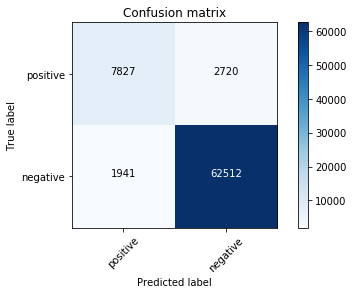

In [115]:
plot_confusion_matrix(confusion_matrix(y_test,pred))

#### Observation:
* True positive=7827
* true negative=62512

## Word2Vec

In [112]:
# Using Google News Word2Vectors
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

In [113]:
# Train your own Word2Vec model using your own text corpus
import gensim

In [114]:
w2v_model=gensim.models.Word2Vec(x_tr,min_count=5,size=200, workers=4)    
type(w2v_model)

gensim.models.word2vec.Word2Vec

In [116]:
# Function to average all word vectors in a paragraph
def featureVecMethod(words, model, num_features):
    # Pre-initialising empty numpy array for speed
    featureVec = np.zeros(num_features,dtype="float32")
    nwords = 0
    
    #Converting Index2Word which is a list to a set for better speed in the execution.
    index2word_set = set(model.wv.index2word)
    
    for word in  words:
        if word in index2word_set:
            nwords = nwords + 1
            featureVec = np.add(featureVec,model[word])
    
    # Dividing the result by number of words to get average
    featureVec = np.divide(featureVec, nwords)
    return featureVec

In [117]:
# Function for calculating the average feature vector
def getAvgFeatureVecs(reviews, model, num_features):
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        reviewFeatureVecs[counter] = featureVecMethod(review, model, num_features)
        counter = counter+1
        
    return reviewFeatureVecs

In [118]:
#finding W2V for 200dimensions
trainDataVecs = getAvgFeatureVecs(x_tr, w2v_model, 200)

In [119]:
#getting Vectorisers for test
testDataVecs = getAvgFeatureVecs(x_test, w2v_model, 200)

In [120]:
#From GridSearchCV Choosing C=100
lr=LogisticRegression(penalty='l2',C=100)
lr.fit(trainDataVecs,y_tr)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [123]:
#predicting on test data
predw2v=lr.predict(testDataVecs)

In [127]:
print("test error",log_loss(y_test, predw2v, labels=lr.classes_, eps=1e-15))

test error 4.8617895332777055


Confusion matrix, without normalization
[[  101 10446]
 [  111 64342]]


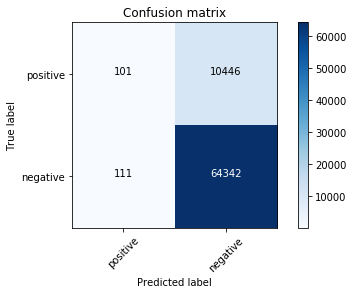

In [124]:
plot_confusion_matrix(confusion_matrix(y_test,predw2v))

* True Possitve=101
* True negative=64342

In [125]:
cvdatavecs=getAvgFeatureVecs(x_cv, w2v_model, 200)

In [126]:
#log-Loss
pred2=lr.predict(cvdatavecs)
print("CV error",log_loss(y_cv, pred2, labels=lr.classes_, eps=1e-15))

CV error 4.813170872262511


## Conclusion:

### Logistic Regression

### Hyperparameter C=100 From GridSearchCV

#### Tf-IDF LR:
* test error 2.1464988224225183
* CV error 2.090116462683089

#### AVGW2V:
* CV error 4.813170872262511
* test error 4.8617895332777055